In [6]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

In [45]:
permittivity_relative = 80.2 #dimensionless
#for distelled water at 20°C 
#https://en.wikipedia.org/wiki/Relative_permittivity#cite_note-10

permittivity_0 = 8.854187*10**(-12) # F/m
#https://en.wikipedia.org/wiki/Permittivity
#permittivity_0 = 1 # F/m
#https://chemistry.stackexchange.com/questions/16434/salt-concentration-and-electrical-permittivity-of-water

zeta_potential = 35 #mV
#moderate stabilty | many variables
#https://en.wikipedia.org/wiki/Zeta_potential

viscosity_dynamic = 1.0016 # mPa.s
#water at 20°C
#https://en.wikipedia.org/wiki/Viscosity


conductivity_specific = 300 #microS/m
# lab experiments ? 

g = 9.81399 # m/s^2 grav acc in spiekeroog
d = 1021 # kg/m^3 density of sea water
h = 2 # m height difference
pressure_gradient  = h * d * g

In [46]:
U = (pressure_gradient * permittivity_relative * permittivity_0 * zeta_potential/10**3 ) /\
((viscosity_dynamic/10**3) * (conductivity_specific/10**6) )
U

1.6575890950475687

In [47]:
r = 10
U/r**2

0.016575890950475687

In [48]:
def U_str_pot_r(pres_grad, perm_rel, perm_0, zeta, visco, conduc, r):
    U_str_pot = (pres_grad * perm_rel * perm_0 * zeta/10**3 ) /\
        ((visco/10**3) * (conduc/10**6) )
    U_r = U_str_pot/r**2
    return U_r

def U_str_pot_no_r(pres_grad, perm_rel, perm_0, zeta, visco, conduc):
    U_str_pot = (pres_grad * perm_rel * perm_0 * zeta/10**3 ) /\
        ((visco/10**3) * (conduc/10**6) )
    return U_str_pot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


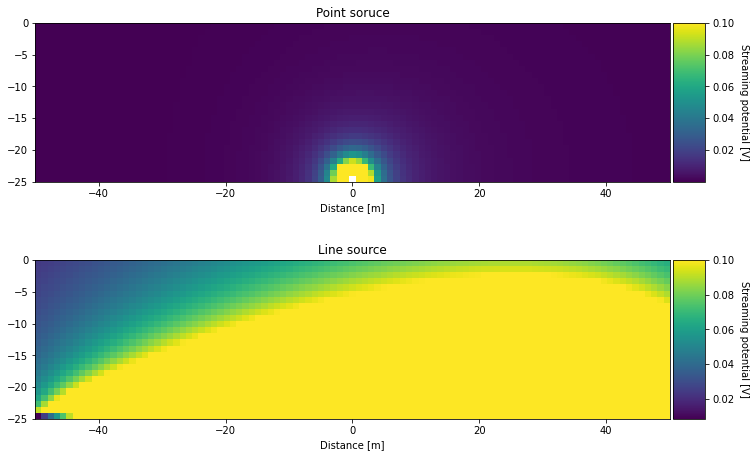

In [51]:
x = np.arange(-50,51)
y = np.arange(0,-26,-1)

xx, yy = np.meshgrid(x,y)
zz = np.sqrt((xx-0)**2 + (yy-y[-1])**2)

U_result = U_str_pot_r(pressure_gradient, permittivity_relative,  permittivity_0, \
                       zeta_potential, viscosity_dynamic, conductivity_specific, zz)

fig, axes = plt.subplots(2, figsize=(12,8))

ax = axes[0]
im  = ax.imshow(U_result, origin='upper', vmax=0.1,\
                extent=[min(x), max(x), min(y), max(y)])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax , )
cbar.ax.set_ylabel('Streaming potential [V]', rotation=270, labelpad=15) 
                                                    
ax.set_xlabel('Distance [m]')
ax.set_title('Point soruce')


#----------------------------------------------------------------------------------------------

pressure_gradient =  np.linspace(100, h * d * g , len(x))
U_result = U_str_pot_no_r(pressure_gradient, permittivity_relative,  permittivity_0, \
                       zeta_potential, viscosity_dynamic, conductivity_specific)

res = np.zeros(xx.shape)
res[-1] = U_result
for i, x_i in enumerate(x):
    for j, y_i in enumerate(y[:-1]):
        r_array = np.sqrt((x_i-x)**2+(y_i-(y[-1]))**2)
        res[j,i] = np.sum(U_result/r_array**2)
                

ax = axes[1]
im  = ax.imshow(res, origin='upper', vmax=0.1,\
                extent=[min(x), max(x), min(y), max(y)])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax , )
cbar.ax.set_ylabel('Streaming potential [V]', rotation=270, labelpad=15)  
ax.set_xlabel('Distance [m]')
ax.set_title('Line source')


fig.savefig('Output/str_pot_point_line.pdf')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


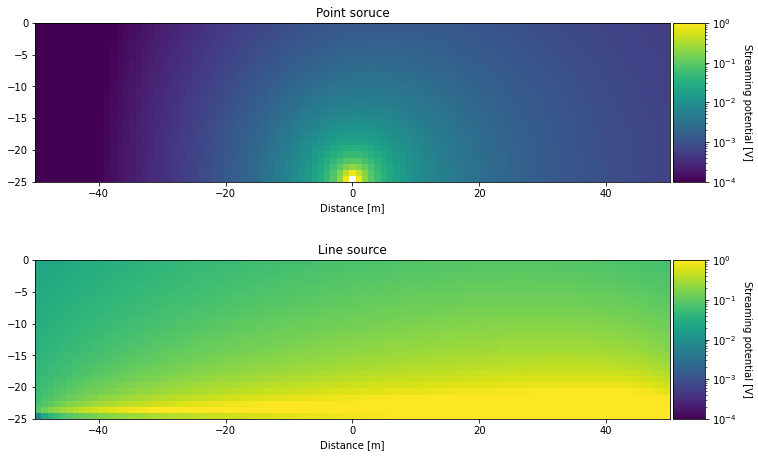

In [52]:
U_result = U_str_pot_r(pressure_gradient, permittivity_relative,  permittivity_0, \
                       zeta_potential, viscosity_dynamic, conductivity_specific, zz)

fig, axes = plt.subplots(2, figsize=(12,8))

ax = axes[0]
im  = ax.imshow(U_result, origin='upper', vmax=1, norm=LogNorm(vmin=0.0001, vmax=1),\
                extent=[min(x), max(x), min(y), max(y)])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax , )
cbar.ax.set_ylabel('Streaming potential [V]', rotation=270, labelpad=15) 
                                                    
ax.set_xlabel('Distance [m]')
ax.set_title('Point soruce')


#----------------------------------------------------------------------------------------------

pressure_gradient =  np.linspace(100, h * d * g , len(x))
U_result = U_str_pot_no_r(pressure_gradient, permittivity_relative,  permittivity_0, \
                       zeta_potential, viscosity_dynamic, conductivity_specific)

res = np.zeros(xx.shape)
res[-1] = U_result
for i, x_i in enumerate(x):
    for j, y_i in enumerate(y[:-1]):
        r_array = np.sqrt((x_i-x)**2+(y_i-(y[-1]))**2)
        res[j,i] = np.sum(U_result/r_array**2)
                

ax = axes[1]
im  = ax.imshow(res, origin='upper', vmax=1, norm=LogNorm(vmin=0.0001, vmax=1),\
                extent=[min(x), max(x), min(y), max(y)])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax , )
cbar.ax.set_ylabel('Streaming potential [V]', rotation=270, labelpad=15)  
ax.set_xlabel('Distance [m]')
ax.set_title('Line source')


fig.savefig('Output/str_pot_point_line_log.pdf')